In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from mpl_toolkits.basemap import Basemap
import folium
import folium.plugins
from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')
from scipy.misc import imread
import codecs
from subprocess import check_output

# 读取数据

In [4]:
terror=pd.read_excel('./data/basedata.xlsx',encoding='ISO-8859-1')
level=pd.read_csv('./data/level.csv',encoding='ISO-8859-1')
terror=terror[['eventid','iyear','imonth','region','latitude','longitude','attacktype1','weaptype1','targtype1','gname']]
terror=pd.concat([terror,level],axis=1)
terror.head(3)

eventid  iyear  imonth  region   latitude  longitude  attacktype1  \
0  199801010001   1998       1      11  -3.375828  29.364107            2   
1  199801010002   1998       1       9  55.751377  37.579914            3   
2  199801010003   1998       1       8  54.607712  -5.956210            2   

   weaptype1  targtype1                            gname  final_score  level  
0          5          4                  Hutu extremists     2.793612      3  
1          6         19                          Unknown     1.174652      2  
2          5         14  Loyalist Volunteer Forces (LVF)     1.306717      2

# 数据处理
### 将题目中的数据加入进行聚类

In [5]:
mean_data = terror.loc[terror['iyear']>=2015].loc[terror['iyear']<=2016].loc[terror['gname']=='Unknown']
pre_list=[]
need_list = [201701090031,201702210037,201703120023,201705050009,201705050010,201707010028,201707020006,201708110018,201711010006,201712010003]
for i in need_list:
    pre_list.append(terror.loc[terror['eventid']==i])
pre_list = pd.concat(pre_list)
mean_data = pd.concat([mean_data,pre_list])

In [6]:
feature = mean_data[['region','attacktype1','weaptype1','targtype1']]

### 将四维数据进行降维，方便可视化结果

In [7]:
from sklearn.manifold import TSNE
tsne=TSNE()
tsne.fit_transform(feature)  #进行数据降维,降成两维
tsne=pd.DataFrame(tsne.embedding_,index=feature.index) #转换数据格式

# 调用聚类方法，进行聚类分析
### k-means聚类

#### 1.调用模型进行训练

In [8]:
from sklearn.cluster import KMeans
from sklearn.externals import joblib
clf = KMeans(n_clusters=60,n_init=1000,init='k-means++')
s = clf.fit_predict(feature)
print(s)

[ 4 19 11 ... 14 17  4]


#### 2.查看结果，预测可视化结果

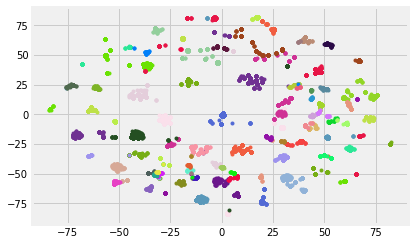

In [12]:
tsne['class']=clf.labels_
class_count = tsne['class'].value_counts().index
colo = np.random.rand(len(class_count),3)
for index,i in enumerate(class_count):
    if(i!=-1):
        d=tsne.loc[tsne['class']==i]
        plt.plot(d[0],d[1],'.',color=colo[index])

In [13]:
clf.inertia_

8763.41227030976

# 判断组织的危险性

#### 1.得到某个组织的聚类个数

In [36]:
zuzhi_count = pd.DataFrame(clf.labels_)[0].value_counts()
zuzhi_count = zuzhi_count/zuzhi_count.max()*5
zuzhi_count = dict(zuzhi_count)
zuzhi_count

{4: 5.0,
 1: 2.307692307692308,
 0: 2.307692307692308,
 17: 1.7137293086660175,
 7: 1.504381694255112,
 14: 1.4021421616358327,
 20: 1.2122687439143136,
 38: 1.153846153846154,
 3: 1.1416747809152872,
 21: 1.056475170399221,
 24: 0.8252190847127556,
 54: 0.7546251217137292,
 45: 0.7327166504381694,
 56: 0.7278481012658228,
 31: 0.7205452775073028,
 42: 0.5574488802336903,
 16: 0.49172346640701076,
 29: 0.4625121713729308,
 15: 0.46007789678675753,
 6: 0.4454722492697176,
 11: 0.4113924050632911,
 19: 0.39435248296007785,
 50: 0.3091528724440117,
 37: 0.2653359298928919,
 33: 0.19961051606621227,
 10: 0.16553067185978576,
 39: 0.16553067185978576,
 9: 0.16309639727361244,
 43: 0.16309639727361244,
 52: 0.16066212268743915,
 27: 0.15822784810126583,
 23: 0.15822784810126583,
 25: 0.15092502434274585,
 58: 0.15092502434274585,
 13: 0.13631937682570594,
 2: 0.13631937682570594,
 41: 0.13388510223953262,
 49: 0.13388510223953262,
 30: 0.12658227848101267,
 59: 0.12414800389483933,
 46: 0.12

In [15]:
mean_data['zuzhi'] = clf.labels_
mean_data

eventid  iyear  imonth  region   latitude   longitude  \
73687   201412030034   2015       1      10  33.303566   44.371773   
74730   201501010001   2015       1      10  33.303566   44.371773   
74731   201501010002   2015       1       8  59.857979   17.639822   
74733   201501010004   2015       1      10  33.303566   44.371773   
74734   201501010005   2015       1      10  33.303566   44.371773   
74735   201501010006   2015       1      10  33.303566   44.371773   
74736   201501010007   2015       1      10  33.057991   44.354839   
74740   201501010011   2015       1       6   9.869925   78.479669   
74742   201501010013   2015       1       6  24.891115   67.143311   
74745   201501010018   2015       1       6  30.366281   68.599642   
74746   201501010020   2015       1      10  30.383333   47.700000   
74747   201501010022   2015       1       6  34.417122   70.449593   
74748   201501010024   2015       1      10  31.784838   35.224613   
74764   201501010068   2015       1       6  32.453788   62.031136   
74766   201501010070   2015       1      10  15.914915   48.650745   
74768   201501010074   2015       1      10  15.470053   45.322776   
74769   201501010075   2015       1      10  36.201721   37.143520   
74774   201501010082   2015       1       6  36.728591   68.868066   
74775   201501010083   2015       1       6  37.184444   68.914444   
74777   201501010095   2015       1       6  28.893738   64.405846   
74779   201501020001   2015       1      10  33.303566   44.371773   
74780   201501020002   2015       1      10  33.303566   44.371773   
74781   201501020043   2015       1       6  32.613889   65.810000   
74782   201501020044   2015       1      11   2.059819   45.326115   
74786   201501020048   2015       1       6  36.337837   73.837770   
74787   201501020049   2015       1       6   7.483368   80.367085   
74789   201501020053   2015       1       6  28.373562   67.565649   
74790   201501020055   2015       1      10  33.349159   43.784199   
74793   201501020058   2015       1       6  33.518611   70.802222   
74794   201501020059   2015       1       6  31.600630   64.369652   
...              ...    ...     ...     ...        ...         ...   
103237  201612300014   2016      12       6  36.388226   69.330012   
103240  201612300017   2016      12       6  16.201036   77.349043   
103242  201612300020   2016      12       6  34.021194   68.999535   
103248  201612300039   2016      12       5   6.951292  124.447787   
103250  201612310003   2016      12       6  34.409556   74.313288   
103251  201612310004   2016      12       6  29.181923   68.211555   
103259  201612310013   2016      12       6  30.661181   73.108576   
103261  201612310015   2016      12       6  34.516895   69.147011   
103262  201612310016   2016      12      11  -3.253245   29.430266   
103263  201612310017   2016      12       6  34.006004   71.537430   
103264  201612310019   2016      12       6  24.798346   93.940430   
103265  201612310022   2016      12       6  32.372459   62.120092   
103266  201612310023   2016      12       6  34.221242   69.078024   
103269  201612310026   2016      12      10  33.303566   44.371773   
103272  201612310029   2016      12      10  33.303566   44.371773   
103273  201612310030   2016      12      10  33.303566   44.371773   
103275  201612310033   2016      12       6  33.803879   72.025434   
103281  201612310039   2016      12       6  31.600630   64.369652   
103283  201612310042   2016      12       5   7.027067  124.386552   
103285  201612310044   2016      12       1  26.819644 -107.069898   
103533  201701090031   2017       1      10  35.032500   43.646389   
104775  201702210037   2017       2       6  32.656200   65.903198   
105390  201703120023   2017       3      11   8.650116   30.987207   
106967  201705050009   2017       5      11   5.561641   31.828492   
106968  201705050010   2017       5      11   5.561641   31.828492   
109039  201707010028   

In [34]:
level_dict = dict()
for i in range(60):
    level_data = mean_data.loc[mean_data['zuzhi']==i]
    data = level_data['level'].sum()/len(level_data)
#     print('{} : {}'.format(i,data))
    level_dict[i]=data
print(level_dict)

{0: 2.1223628691983123, 1: 2.2742616033755274, 2: 2.1785714285714284, 3: 2.4371002132196162, 4: 2.185491723466407, 5: 2.0625, 6: 2.180327868852459, 7: 2.1132686084142396, 8: 2.05, 9: 2.8059701492537314, 10: 2.014705882352941, 11: 2.834319526627219, 12: 2.52, 13: 2.107142857142857, 14: 2.3489583333333335, 15: 2.2433862433862433, 16: 2.277227722772277, 17: 2.078125, 18: 2.8214285714285716, 19: 2.3333333333333335, 20: 2.2650602409638556, 21: 2.152073732718894, 22: 2.1333333333333333, 23: 2.1846153846153844, 24: 2.1474926253687316, 25: 2.1451612903225805, 26: 2.2777777777777777, 27: 2.3076923076923075, 28: 2.4705882352941178, 29: 2.4526315789473685, 30: 2.7115384615384617, 31: 2.2804054054054053, 32: 1.875, 33: 2.841463414634146, 34: 2.138888888888889, 35: 2.272727272727273, 36: 2.4827586206896552, 37: 2.1926605504587156, 38: 2.1877637130801686, 39: 2.1470588235294117, 40: 2.090909090909091, 41: 2.4545454545454546, 42: 2.0829694323144103, 43: 2.1940298507462686, 44: 2.0384615384615383, 45:

In [41]:
score_dict = dict()
for i in range(60):
    score = level_dict.get(i)*0.5+zuzhi_count.get(i)*0.5
    score_dict[i]=score
score_dict = dict(sorted(score_dict.items(), key=lambda d:d[1],reverse=True))
score_dict

{4: 3.5927458617332038,
 1: 2.2909769555339174,
 0: 2.2150275884453103,
 17: 1.8959271543330087,
 14: 1.875550247484583,
 7: 1.8088251513346758,
 3: 1.7893874970674517,
 20: 1.7386644924390846,
 38: 1.6708049334631614,
 11: 1.622855965845255,
 21: 1.6042744515590575,
 54: 1.5611835285988,
 56: 1.522786926887092,
 33: 1.5205369653501792,
 31: 1.500475341456354,
 24: 1.4863558550407436,
 9: 1.484533273263672,
 29: 1.4575718751601496,
 18: 1.4447941299207123,
 45: 1.441109155783869,
 30: 1.419060370009737,
 16: 1.3844755945896439,
 19: 1.3638429081467056,
 15: 1.3517320700865003,
 42: 1.3202091562740503,
 6: 1.3129000590610884,
 50: 1.2963087196865728,
 41: 1.2942152783924936,
 58: 1.293204447655244,
 12: 1.2904284323271664,
 28: 1.2766767856120054,
 36: 1.2766762918443408,
 59: 1.2679563548885961,
 27: 1.2329600778967866,
 37: 1.2289982401758037,
 55: 1.224342745861733,
 52: 1.2242704552831136,
 43: 1.1785631240099406,
 23: 1.171421616358325,
 47: 1.1704284323271663,
 48: 1.1639483933787

#### 计算某一个元素各个离距离中心的距离
#### 对预测结果进行排序，排序出前五个组织的可能性

In [63]:
def predict(id_):    
    need_predict = np.array(terror.loc[terror['eventid']==id_][['region','attacktype1','weaptype1','targtype1']])
    result = clf.predict(need_predict)
    centers = clf.cluster_centers_
    result_dict = dict()
    for i in range(centers.shape[0]):
        sum_num = 0
        for j in range(centers.shape[1]):
            sum_num = sum_num + np.square(need_predict[0][j] - centers[i,j])
        sum_num = np.sqrt(sum_num)
        result_dict[i] = sum_num
    result_dict = dict(sorted(result_dict.items(), key=lambda d:d[1]))
#     print(result)
    real_dict = {}
    for i in [4,1,0,17,14]:
        real_dict[i] = result_dict.get(i)
        real_dict = dict(sorted(real_dict.items(), key=lambda d:d[1]))
    return real_dict
id_list = [201701090031,201702210037,201703120023,201705050009,201705050010,201707010028,201707020006,201708110018,201711010006,201712010003]
for i in id_list:
    print("id:{}           dict:{}".format(i,predict(i).keys()))

id:201701090031           dict:dict_keys([4, 14, 0, 17, 1])
id:201702210037           dict:dict_keys([1, 14, 4, 17, 0])
id:201703120023           dict:dict_keys([1, 4, 14, 0, 17])
id:201705050009           dict:dict_keys([0, 4, 17, 14, 1])
id:201705050010           dict:dict_keys([0, 4, 17, 14, 1])
id:201707010028           dict:dict_keys([4, 14, 0, 17, 1])
id:201707020006           dict:dict_keys([1, 4, 14, 0, 17])
id:201708110018           dict:dict_keys([14, 4, 17, 0, 1])
id:201711010006           dict:dict_keys([17, 0, 14, 4, 1])
id:201712010003           dict:dict_keys([4, 14, 0, 17, 1])


### DBSCAN聚类分析

#### 1.调用模型进行训练

In [17]:
from sklearn.cluster import DBSCAN
y_pred = DBSCAN(eps = 0.1, min_samples = 20)
s = y_pred.fit_predict(feature)
print(y_pred)
print(pd.DataFrame(s)[0].value_counts())

DBSCAN(algorithm='auto', eps=0.1, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=20, n_jobs=1, p=None)
-1     2069
 0     1920
 7      689
 3      677
 18     584
 10     455
 28     439
 6      275
 31     252
 14     219
 17     213
 49     173
 33     156
 22     149
 29     142
 12     131
 35     125
 56     119
 32     114
 5      113
 36     112
 43     107
 24     100
 4       99
 39      92
 15      90
 58      81
 45      79
 46      78
 65      75
       ... 
 62      35
 47      35
 79      35
 75      34
 74      34
 71      34
 55      32
 59      32
 41      31
 9       30
 27      30
 82      29
 8       29
 20      28
 2       27
 67      27
 19      26
 73      25
 21      25
 87      24
 26      24
 77      23
 64      23
 48      23
 86      23
 34      22
 84      20
 11      20
 90      20
 91      20
Name: 0, Length: 93, dtype: int64


#### 2.查看结果，预测可视化结果

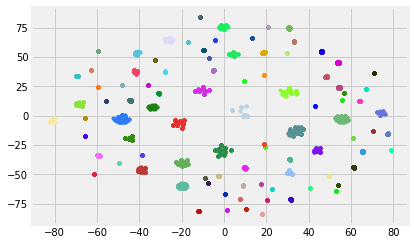

In [18]:
tsne['class']=s
class_count = tsne['class'].value_counts().index
colo = np.random.rand(len(class_count),3)
for index,i in enumerate(class_count):
    if(i!=-1):
        d=tsne.loc[tsne['class']==i]
        plt.plot(d[0],d[1],'.',color=colo[index])

#### 3.查看未分类成功点

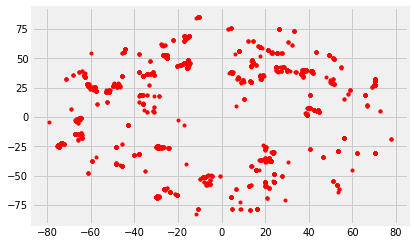

In [19]:
d=tsne.loc[tsne['class']==-1]
plt.plot(d[0],d[1],'r.')

In [50]:
data = terror.loc[terror['eventid']==201703120023][['region','attacktype1','weaptype1','targtype1']]
y_pred.fit_predict(data)

array([-1], dtype=int64)

### AgglomerativeClustering聚类

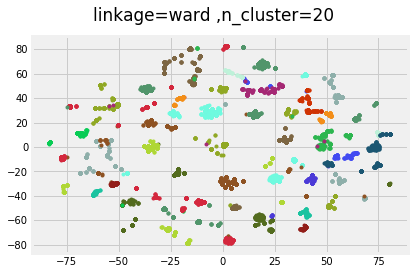

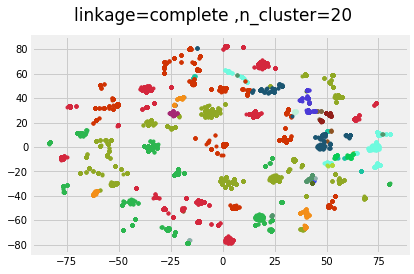

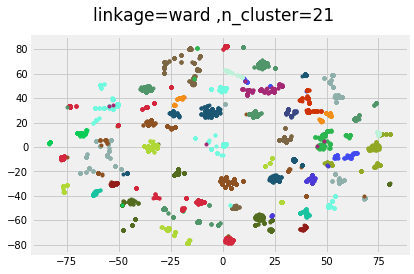

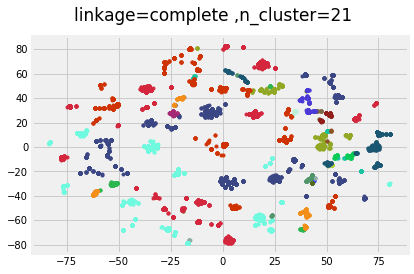

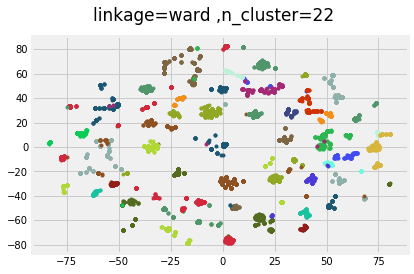

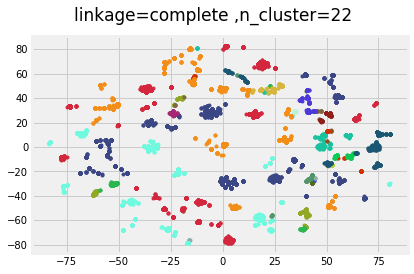

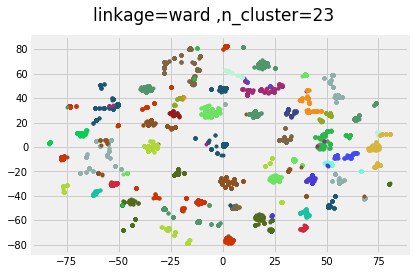

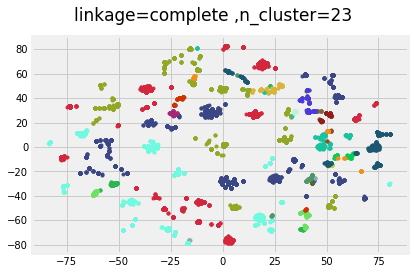

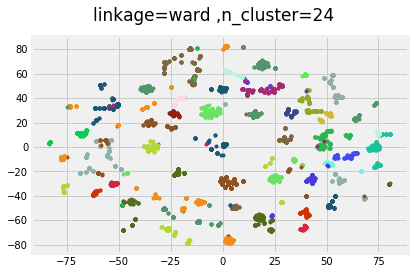

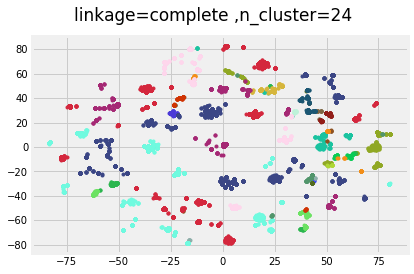

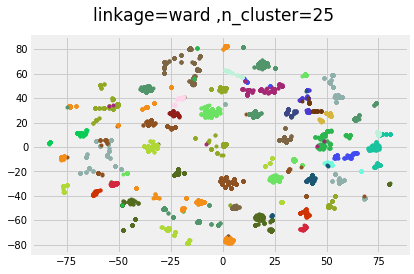

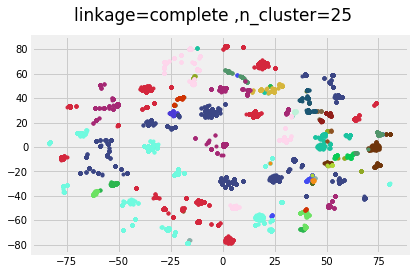

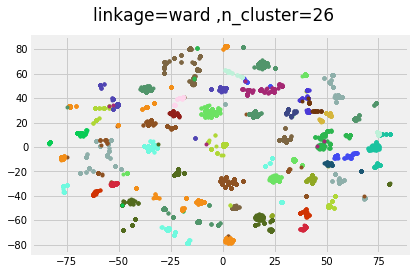

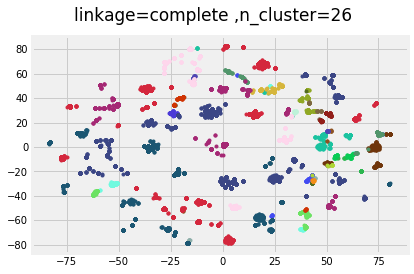

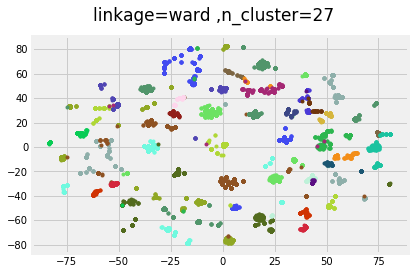

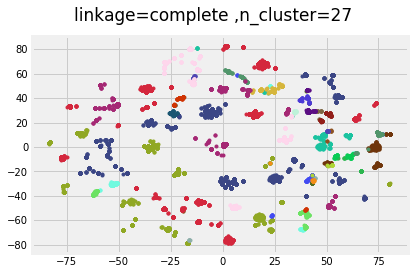

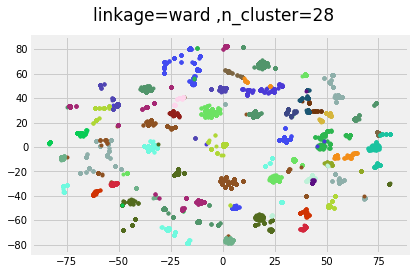

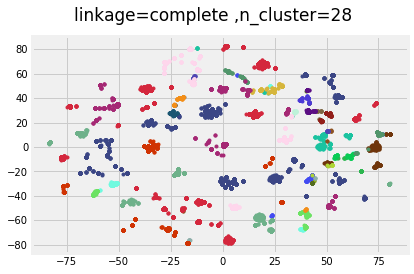

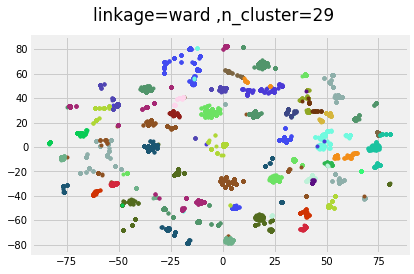

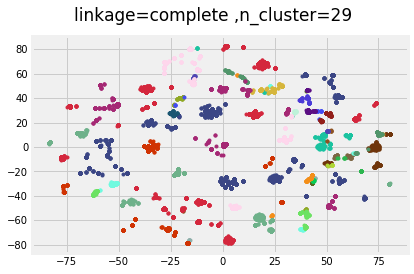

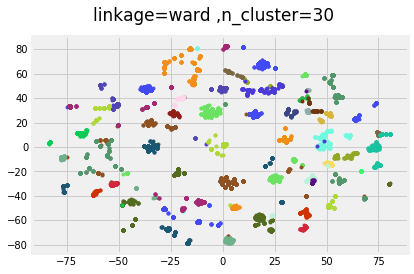

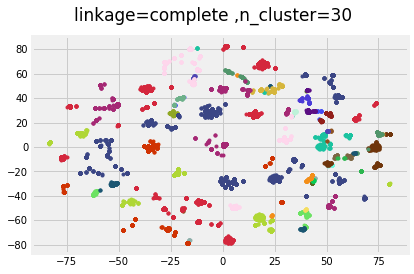

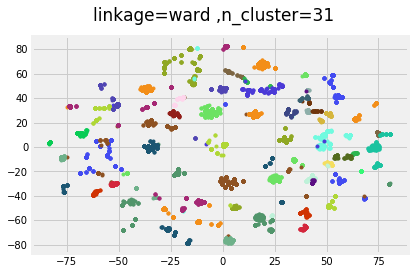

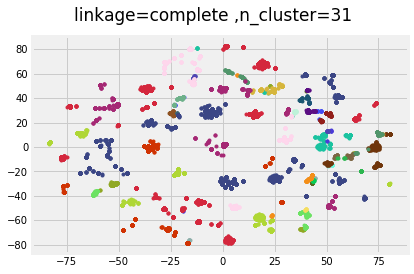

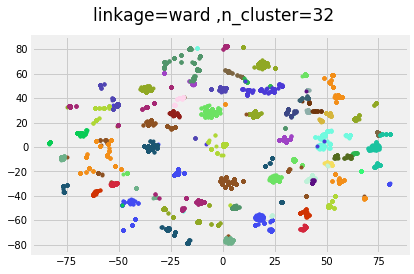

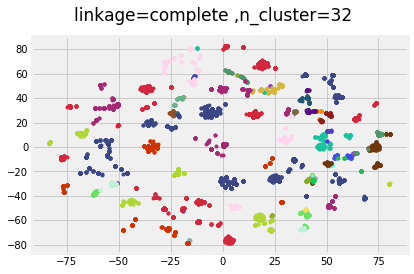

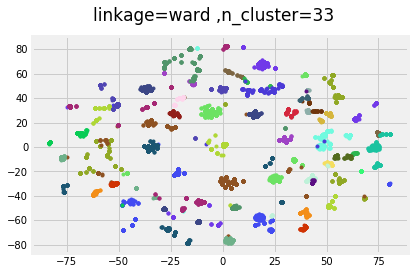

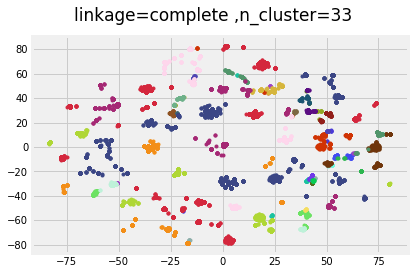

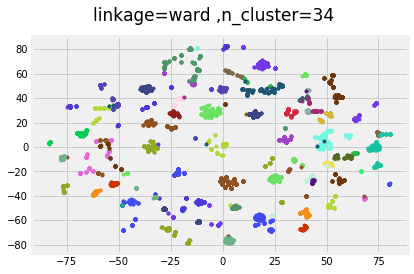

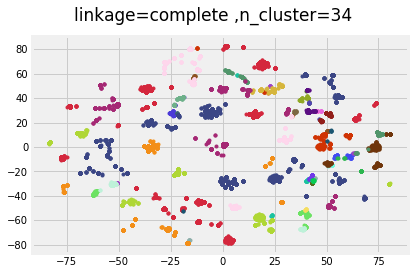

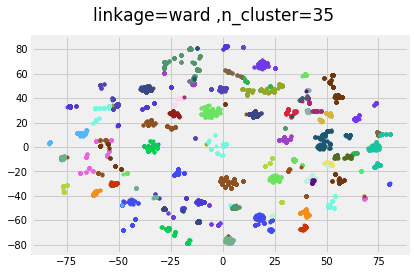

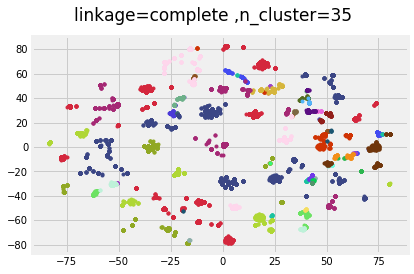

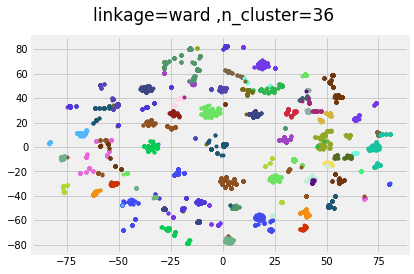

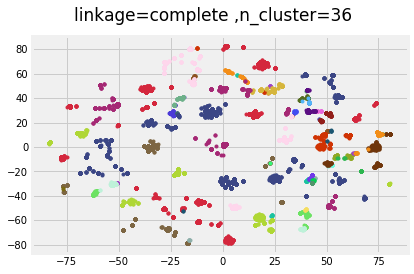

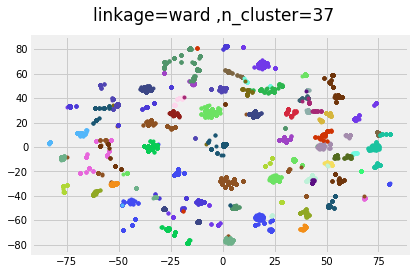

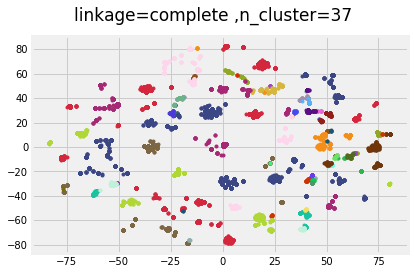

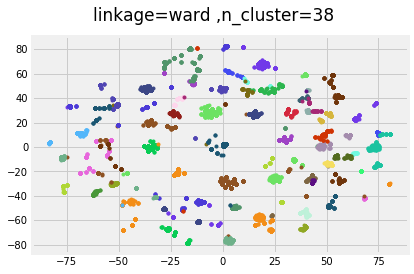

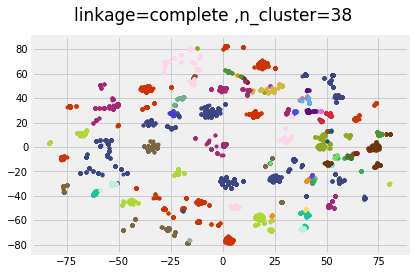

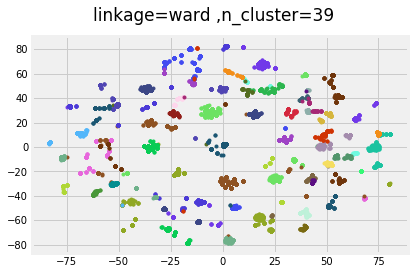

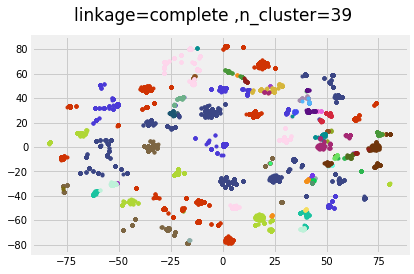

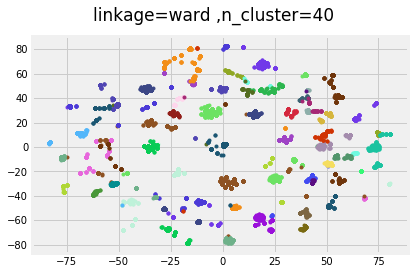

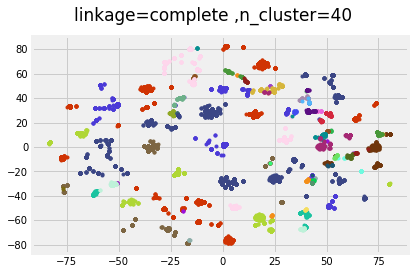

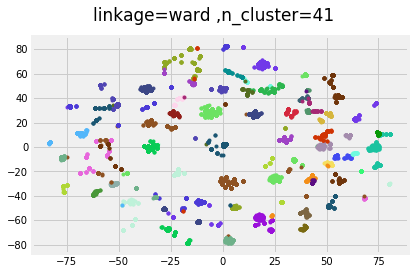

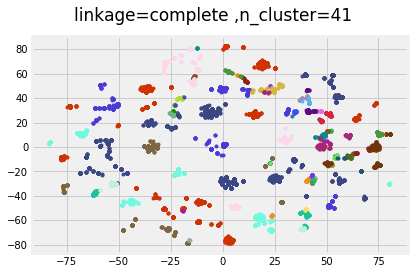

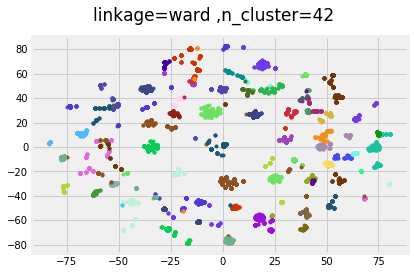

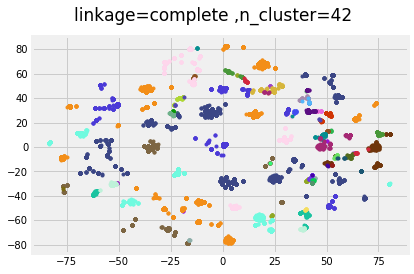

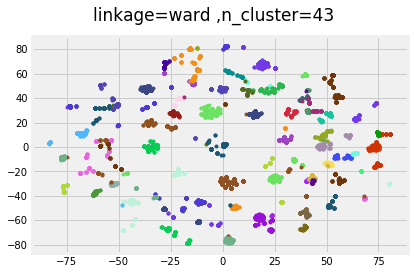

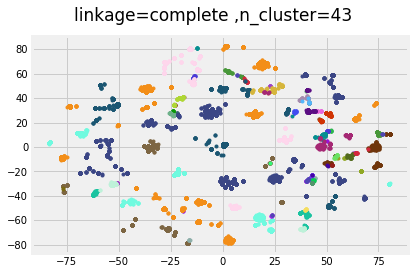

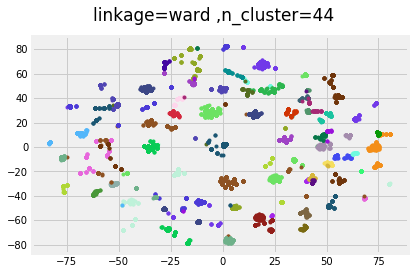

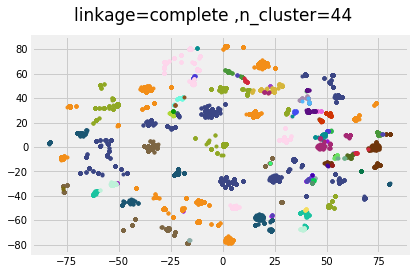

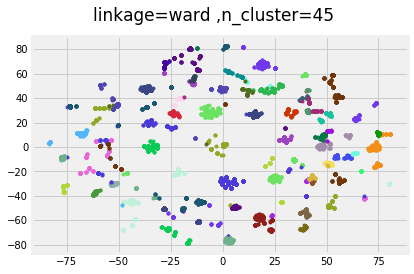

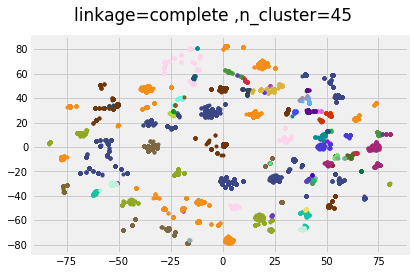

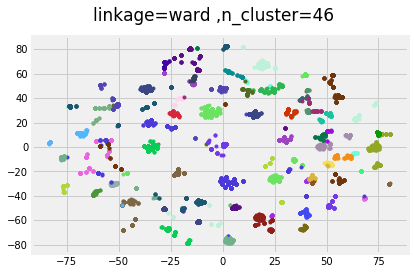

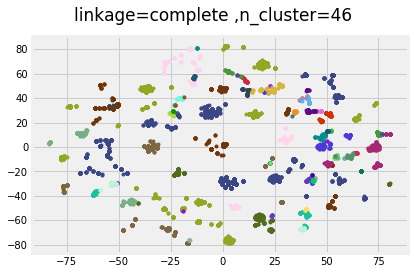

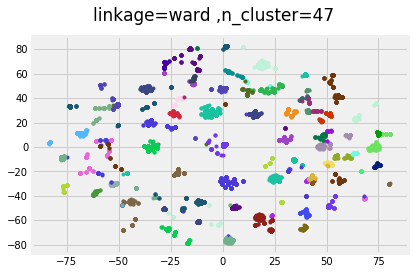

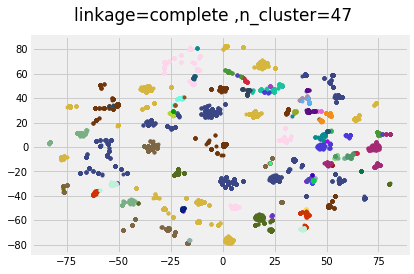

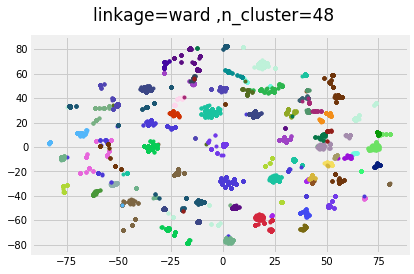

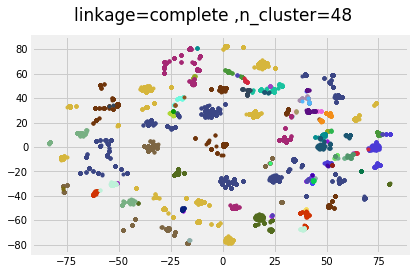

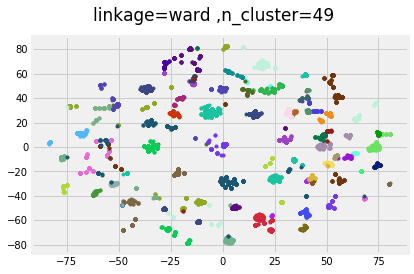

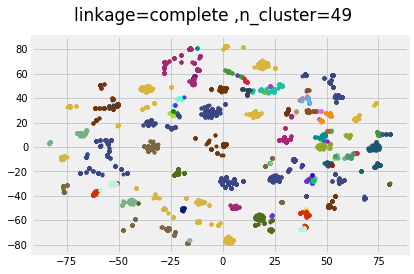

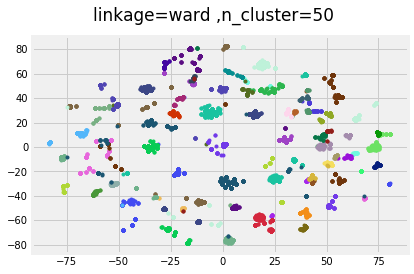

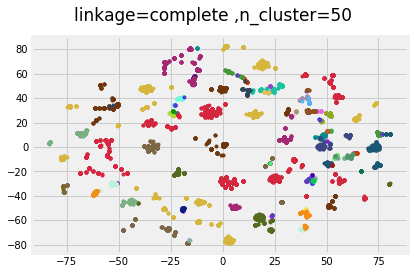

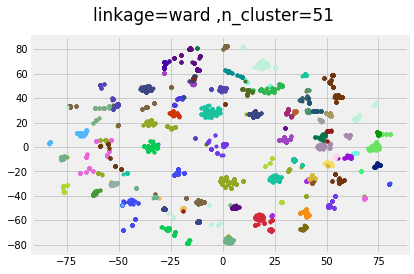

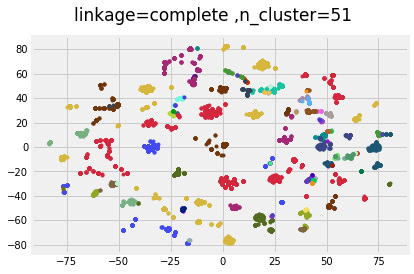

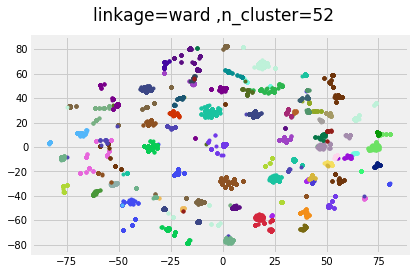

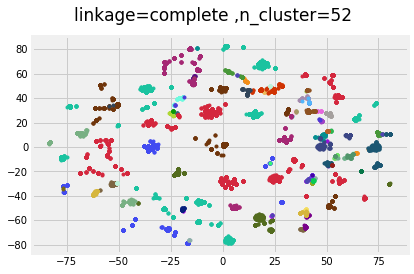

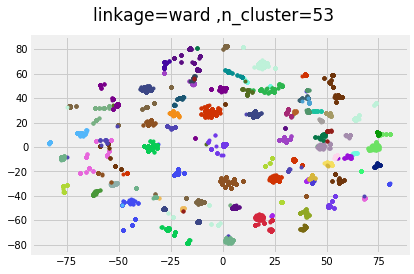

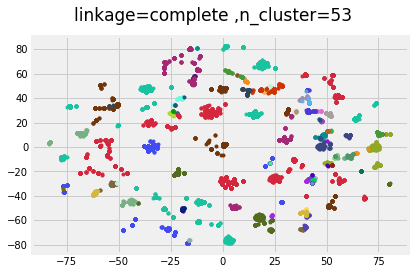

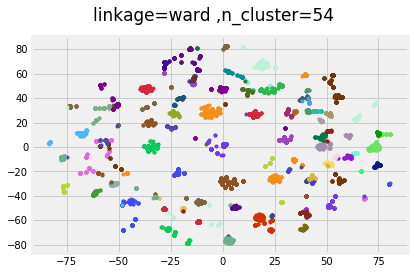

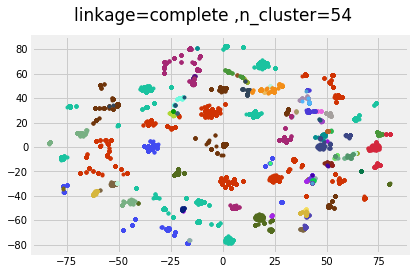

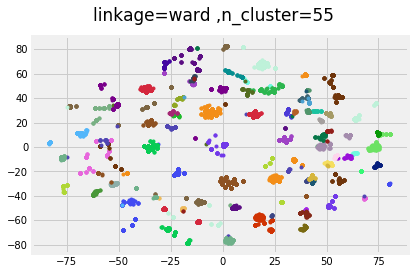

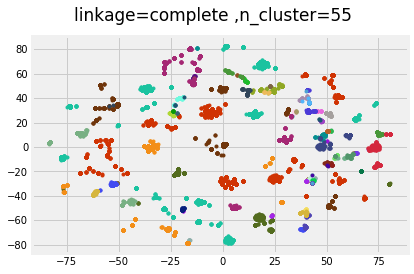

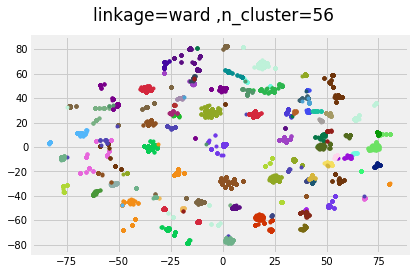

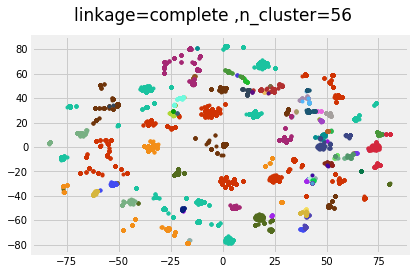

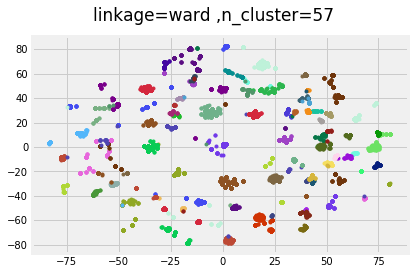

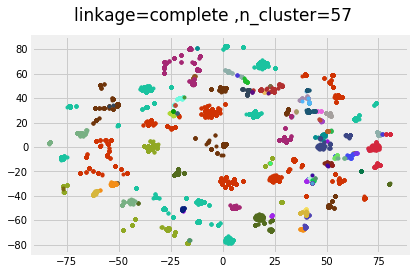

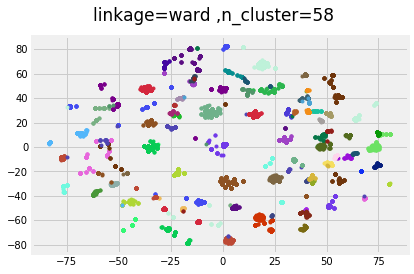

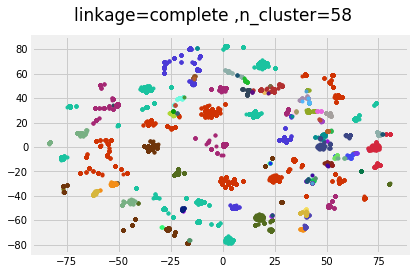

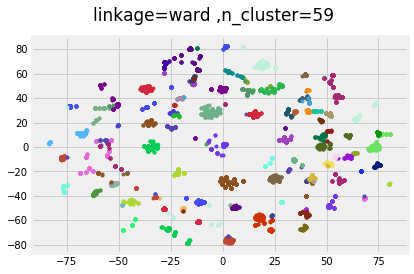

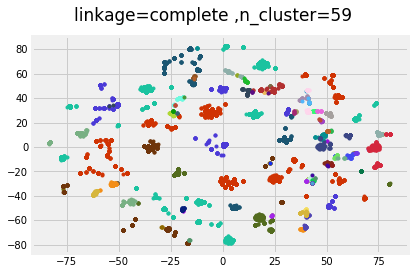

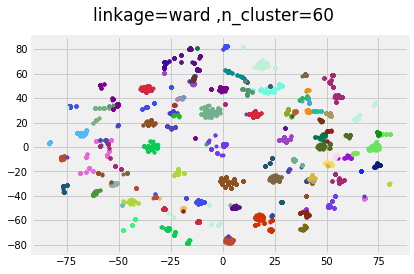

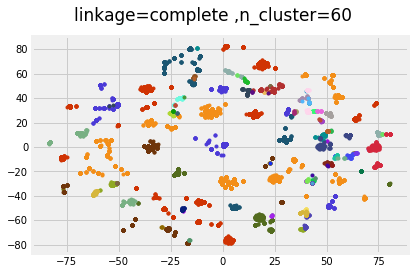

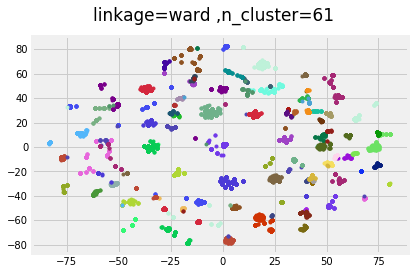

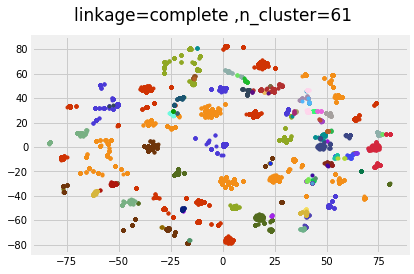

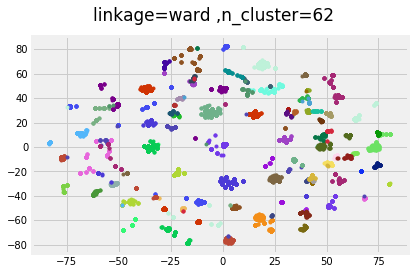

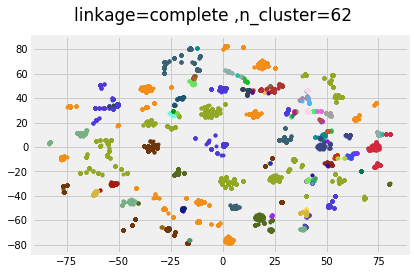

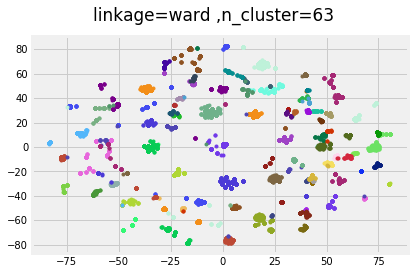

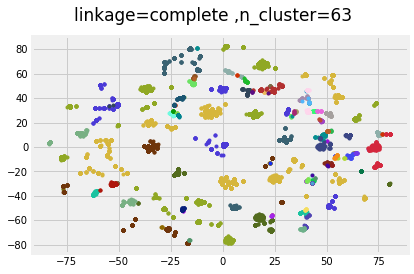

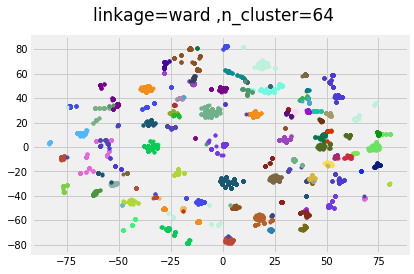

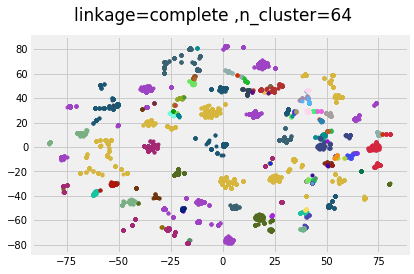

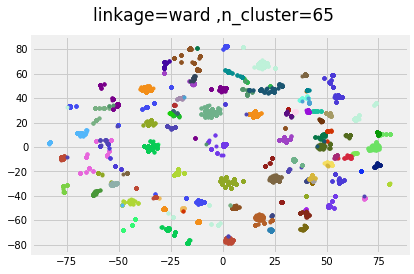

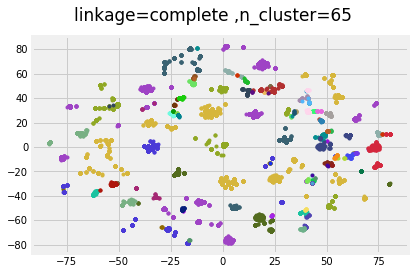

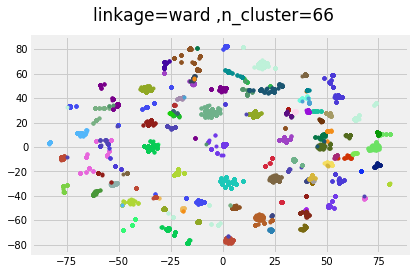

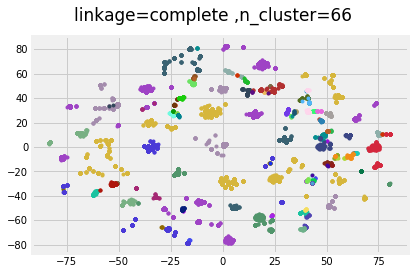

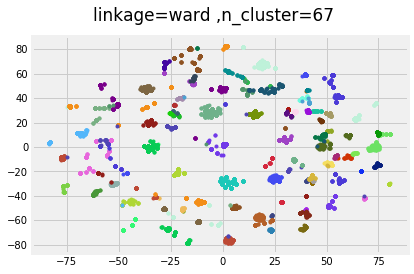

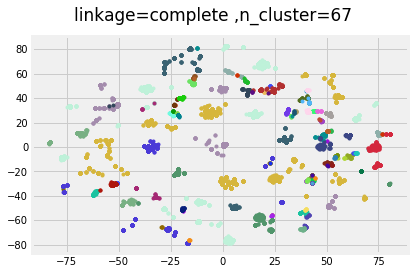

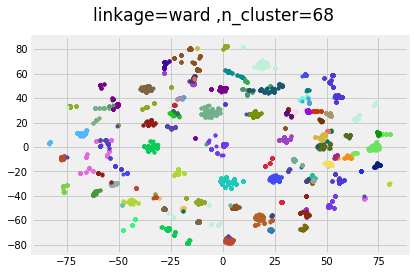

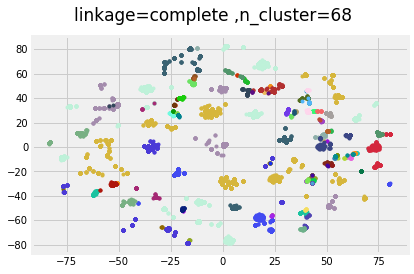

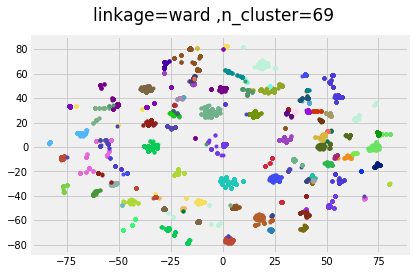

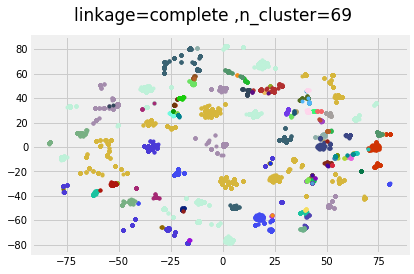

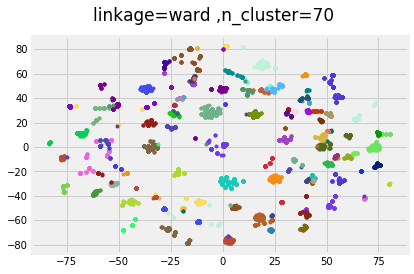

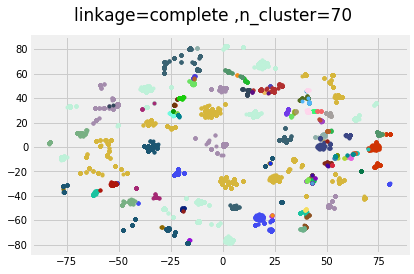

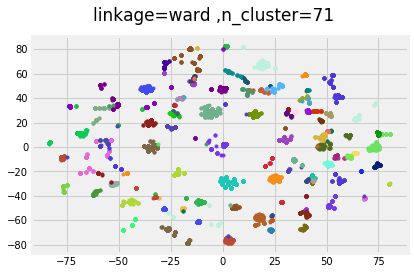

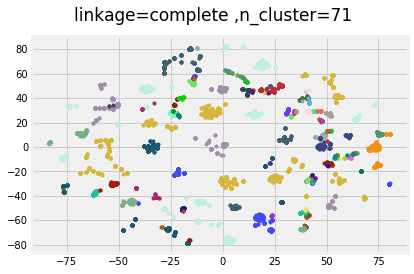

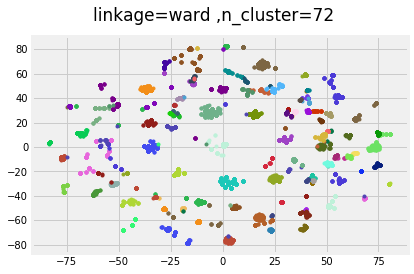

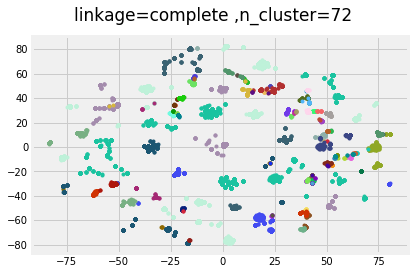

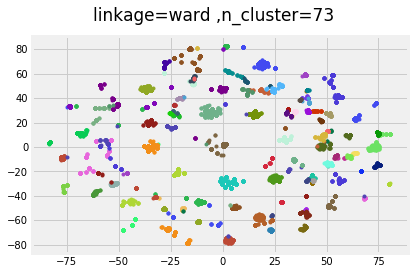

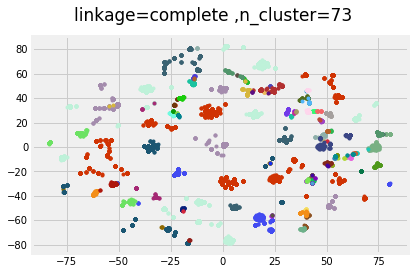

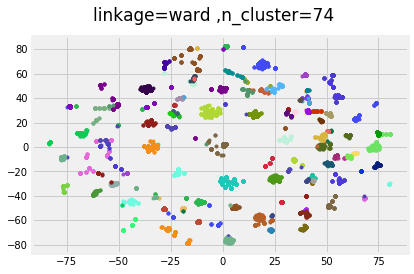

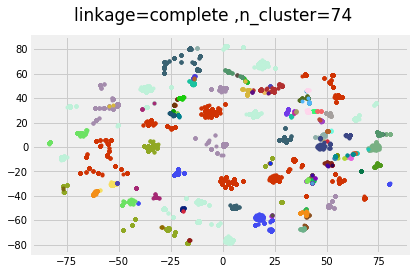

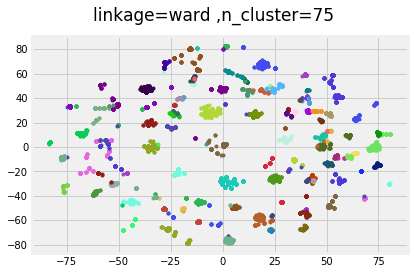

KeyboardInterrupt: 

In [77]:
from sklearn.cluster import AgglomerativeClustering
for clusters in range(20,100,1):
    for linkage in ('ward','complete'):
        clustering = AgglomerativeClustering(linkage=linkage, n_clusters=clusters)
        clustering.fit(feature)
        tsne['class']=clustering.labels_
        for index,i in enumerate(class_count):
            if(i!=-1):
                d=tsne.loc[tsne['class']==i]
                plt.plot(d[0],d[1],'.',color=colo[index])
        plt.suptitle('linkage={} ,n_cluster={}'.format(linkage,clusters), size=17)
        plt.show()

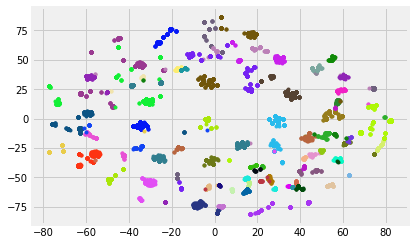

In [18]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage='ward', n_clusters=60)
clustering.fit(feature)
tsne['class']=clustering.labels_
for index,i in enumerate(class_count):
    if(i!=-1):
        d=tsne.loc[tsne['class']==i]
        plt.plot(d[0],d[1],'.',color=colo[index])
plt.show()

In [21]:
tsne['class'].value_counts()

32    2046
12     895
16     858
7      771
9      623
31     563
28     538
3      499
15     485
11     442
13     358
26     344
27     316
51     301
33     283
4      226
34     202
2      184
17     181
22     180
6      170
45     124
38     108
25      95
56      85
53      82
1       81
43      74
0       70
35      67
37      66
47      64
18      64
14      63
29      62
46      62
42      56
41      55
8       54
39      52
21      48
40      44
24      36
54      31
59      30
5       29
19      29
23      28
55      28
57      27
49      26
30      25
10      25
20      25
44      24
52      20
50      16
58      15
48      12
36       9
Name: class, dtype: int64